# Comparison of ler result with Wierda et al. 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json
# from scipy.stats import gaussian_kde

from ler.rates import LeR

# With model settings given in Wierda et al. 2021

* Merger rate density model
  * change R0 only 

* GW source mass distribution model for BBH

In [10]:
# initialize LeR
ler = LeR(
    npool=6,
    verbose=False,
    # SNR related
    sampling_frequency =  2048,
    waveform_approximant =  'IMRPhenomD',
    minimum_frequency =  20.0,
    snr_type =  'interpolation',
    ifos =  ['L1', 'H1', 'V1'],
    # GW related
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 
        'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 
        'zs': 'sample_source_redshift', 
        'geocent_time': 'sampler_uniform', 
        'ra': 'sampler_uniform', 
        'dec': 'sampler_cosine', 
        'phase': 'sampler_uniform', 
        'psi': 'sampler_uniform', 
        'theta_jn': 'sampler_sine'
        },      
    source_priors_params= {
        # 'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30.}, 
        'source_frame_masses': {'mminbh': 4.59, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.10, 'delta_m': 4.82, 'beta': 1.26}, 
        'zs': None, 
        'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 
        'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'dec': None, 
        'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 
        'theta_jn': None
        },
    spin_zero= True,
    spin_precession= False,
    # lens related
    lens_type =  'epl_galaxy',
    lens_functions =  {
        'strong_lensing_condition': 'rjs_with_cross_section_SIS', 
        'optical_depth': 'optical_depth_SIS_haris', 
        'param_sampler_type': 'sample_all_routine',
        },
    lens_priors =  {
        'source_redshift_sl': 'strongly_lensed_source_redshifts', 
        'lens_redshift': 'lens_redshift_SDSS_catalogue', 
        'velocity_dispersion': 'velocity_dispersion_gengamma', 
        'axis_ratio': 'axis_ratio_rayleigh', 
        'axis_rotation_angle': 'axis_rotation_angle_uniform', 
        'shear': 'shear_norm', 
        'mass_density_spectral_index': 'mass_density_spectral_index_normal', 
        'source_parameters': 'sample_gw_parameters',
        },
    lens_priors_params =  {
        'source_redshift_sl': None, 
        'lens_redshift': None, 
        'velocity_dispersion': {'a':2.32 / 2.67, 'c':2.67}, 
        'axis_ratio': {'q_min': 0.2, 'q_max': 1.0}, 
        'axis_rotation_angle': {'phi_min': 0.0, 'phi_max': 2*np.pi}, 
        'shear': {'scale': 0.05}, 
        'mass_density_spectral_index': {'mean': 2.0, 'std': 0.2}, 'source_parameters': None
    },
    # image related
    n_min_images =  2,
    n_max_images =  4,
    lens_model_list =  ['EPL_NUMBA', 'SHEAR'],
)

In [12]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=10000,
    batch_size=200000,
    snr_threshold=8.0,
    resume=False,
    output_jsonfile='n_unlensed_param_detectable_wierda.json',
    meta_data_file='meta_unlensed_wierda.json',
    trim_to_size=False,
)

collected number of detectable events =  0
collected number of detectable events =  1692
total number of events =  200000
total unlensed rate (yr^-1): 875.8037049993032
collected number of detectable events =  3306
total number of events =  400000
total unlensed rate (yr^-1): 855.616740167759
collected number of detectable events =  4851
total number of events =  600000
total unlensed rate (yr^-1): 836.982618784795
collected number of detectable events =  6516
total number of events =  800000
total unlensed rate (yr^-1): 843.1939925791164
collected number of detectable events =  8104
total number of events =  1000000
total unlensed rate (yr^-1): 838.9495538196634
collected number of detectable events =  9685
total number of events =  1200000
total unlensed rate (yr^-1): 835.5160444166913
collected number of detectable events =  11375
total number of events =  1400000
total unlensed rate (yr^-1): 841.1235346476759
storing detectable unlensed params in ./ler_data/n_unlensed_param_detecta

## With LeR default settings

In [8]:
ler = LeR(npool=6, verbose=False)

In [9]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=10000,
    batch_size=200000,
    snr_threshold=8.0,
    resume=True,
    output_jsonfile='n_unlensed_param_detectable_ler.json',
    meta_data_file='meta_unlensed_ler.json',
    trim_to_size=False,
)

collected number of detectable events =  0
collected number of detectable events =  844
total number of events =  200000
total unlensed rate (yr^-1): 436.8666235339314
collected number of detectable events =  1649
total number of events =  400000
total unlensed rate (yr^-1): 426.77314111815923
collected number of detectable events =  2478
total number of events =  600000
total unlensed rate (yr^-1): 427.5495628424494
collected number of detectable events =  3345
total number of events =  800000
total unlensed rate (yr^-1): 432.85511129176547
collected number of detectable events =  4163
total number of events =  1000000
total unlensed rate (yr^-1): 430.96581842932613
collected number of detectable events =  5099
total number of events =  1200000
total unlensed rate (yr^-1): 439.8860413506153
collected number of detectable events =  5920
total number of events =  1400000
total unlensed rate (yr^-1): 437.75396264740584
collected number of detectable events =  6754
total number of events 

In [6]:
# ler.batch_size = 100000 # for faster computation
ler.batch_size = 200000 # for faster computation
unlensed_param = ler.unlensed_cbc_statistics(size=1000000, resume=True, save_batch=False, output_jsonfile='unlensed_cbc_bbh.json')

unlensed params will be store in ./ler_data/unlensed_cbc_bbh.json
chosen batch size = 200000 with total size = 1000000
There will be 5 batche(s)
resuming from ./ler_data/unlensed_cbc_bbh.json
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_cbc_bbh.json 


In [7]:
_, unlensed_param_detectable = ler.unlensed_rate();

getting unlensed_params from json file ./ler_data/unlensed_cbc_bbh.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 836.0823259241994
number of simulated unlensed detectable events: 10168
number of all simulated unlensed events: 1000000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


In [12]:
lensed_param = ler.lensed_cbc_statistics(size=1000000, resume=True, save_batch=False, output_jsonfile='lensed_cbc_bbh.json')

lensed params will be store in ./ler_data/lensed_cbc_bbh.json
chosen batch size = 200000 with total size = 1000000
There will be 5 batche(s)
resuming from ./ler_data/lensed_cbc_bbh.json
Batch no. 3
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4024.34it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4031.58it/s]


Invalid sample found. Resampling 10 lensed events...
solving lens equations...


100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.79it/s]


calculating snrs...
Batch no. 5
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4004.54it/s]


Invalid sample found. Resampling 6 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.66it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_cbc_bbh.json 


In [13]:
_, lensed_param_detectable = ler.lensed_rate();

getting lensed_params from json file ./ler_data/lensed_cbc_bbh.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 0.5190467942625464
number of simulated lensed detectable events: 8038
number of simulated all lensed events: 1100000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json


In [14]:
ler.rate_ratio();

unlensed_rate: 836.0823259241994
lensed_rate: 0.5190467942625464
ratio: 1610.8033710372724


In [25]:
lensed_param_detectable = get_param_from_json('./ler_data/lensed_param_detectable.json')
snr = lensed_param_detectable['optimal_snr_net']

In [39]:
len(lensed_param_detectable['optimal_snr_net'])

8038

In [31]:
lensed_param_detectable['optimal_snr_net']

array([[19.80471621, 18.60105514, 20.69181331, 15.89275877],
       [ 7.71072958, 12.60012569, 13.7148824 , 11.88096558],
       [27.9083384 , 21.09015775,  0.        ,  0.        ],
       ...,
       [ 4.61896283, 36.19772839, 35.98302468,  0.        ],
       [ 9.78493604, 11.80316783,  6.53815329,  5.01105635],
       [15.43833146,  8.0329634 ,  0.        ,  0.        ]])

In [41]:
idx1 = abs(lensed_param_detectable['optimal_snr_net'])>8
idx2 = np.sum(idx1, axis=1)==4
idx2

array([ True, False, False, ..., False, False, False])

In [38]:
np.sum(idx2)

762

In [44]:
np.sum(idx2)/len(idx2)*100 # percentage of detectable events

9.479970141826325

## Velocity dispersion

In [46]:
# get detectable + undetectable events
lensed_param = get_param_from_json('./ler_data/lensed_cbc_bbh.json')
# get detectable events
lensed_param_detectable = get_param_from_json('./ler_data/lensed_param_detectable.json')

In [ ]:
len

In [48]:
sigma_sl = lensed_param['sigma']
sigma_sl_detectable = lensed_param_detectable['sigma']
sigma = ler.sample_velocity_dispersion(size=10000)

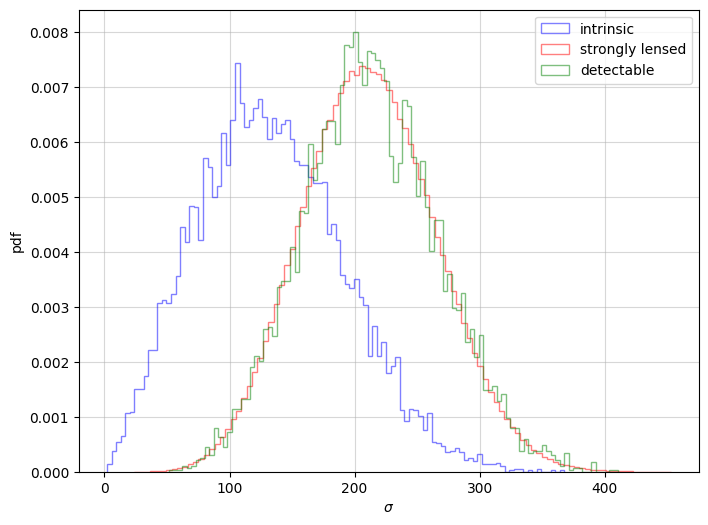

In [49]:
# plt hist
plt.figure(figsize=(8, 6))
plt.hist(sigma, bins=100, alpha=0.5, label='intrinsic', color='b', density=True, histtype='step')
plt.hist(sigma_sl, bins=100, alpha=0.5, label='strongly lensed', color='r', density=True, histtype='step')
plt.hist(sigma_sl_detectable, bins=100, alpha=0.5, label='detectable', color='g', density=True, histtype='step')
plt.xlabel(r'$\sigma$')
plt.ylabel('pdf')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [50]:
from ler.utils import append_json

In [53]:
dict_ = {'sigma': sigma, 'sigma_sl': sigma_sl, 'sigma_sl_detectable': sigma_sl_detectable}



In [54]:
append_json('./ler_data/sigma_data.json', dict_, replace=True)

{'sigma': array([159.07112905, 119.15953389, 208.28868289, ..., 124.52035711,
         99.06916462, 108.75275511]),
 'sigma_sl': array([213.78698756, 204.42195337, 269.27770186, ..., 180.84078207,
        266.43637834, 194.28008519]),
 'sigma_sl_detectable': array([256.69849264, 343.47528783, 191.82468661, ..., 209.87593548,
        287.9464501 , 194.16780163])}

In [2]:
unlensed_param = get_param_from_json('./ler_data/unlensed_cbc_bbh.json')
iota = unlensed_param['theta_jn']

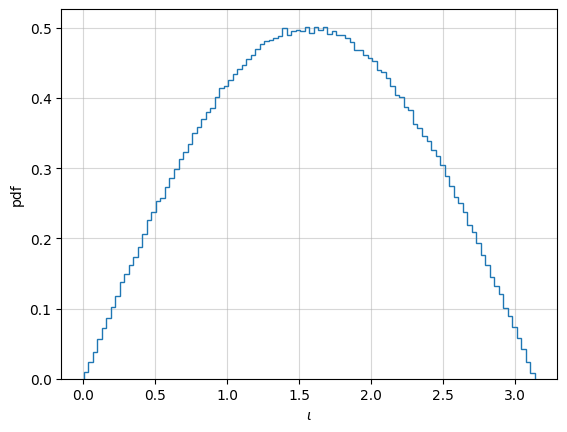

In [4]:
plt.hist(iota, bins=100, density=True, histtype='step')
plt.xlabel(r'$\iota$')
plt.ylabel('pdf')
plt.grid(alpha=0.5)
plt.show()

## Comparison with different mass distributions

In [26]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# initialize LeR
ler1 = LeR(
    npool=8,
    verbose=False,
    # GW related
    source_priors= {
        'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 
        },      
    source_priors_params= {
        'source_frame_masses': {'mminbh': 4.59, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.10, 'delta_m': 4.82, 'beta': 1.26}, 
        },
)

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:162: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:160: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)-_np.log(self.norm)


In [34]:
ler2 = LeR(
    npool=8,
    verbose=False,
)

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:48: RuntimeWarning: overflow encountered in exp
  effe_prime[select_window] = _np.exp(_np.nan_to_num((delta_m/mprime[select_window])+(delta_m/(mprime[select_window]-delta_m))))
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:162: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)
/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/gwcosmo/prior/custom_math_priors.py:160: RuntimeWarning: divide by zero encountered in log
  prob_ret =self.origin_prob.log_prob(x)+_np.log(window)-_np.log(self.norm)


In [6]:
m1_w, m2_w = ler1.sample_source_frame_masses(size=10000)
m1_l, m2_l = ler2.sample_source_frame_masses(size=10000)

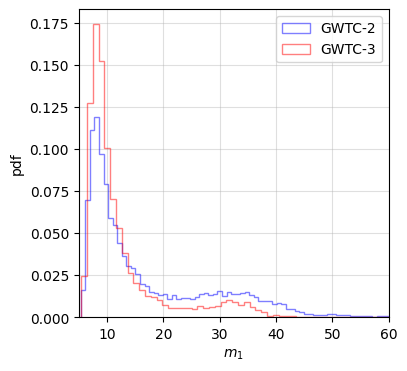

In [15]:
# plot
plt.figure(figsize=(4, 4))
plt.hist(m1_w, bins=100, alpha=0.5, label='GWTC-2', color='b', density=True, histtype='step')
plt.hist(m1_l, bins=100, alpha=0.5, label='GWTC-3', color='r', density=True, histtype='step')
plt.xlabel(r'$m_1$')
plt.ylabel('pdf')
plt.legend()
plt.xlim(5, 60)
plt.grid(alpha=0.4)
plt.show()

In [38]:
ler1.batch_size = 200000
ler1.unlensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='unlensed_cbc_bbh_w.json');

unlensed params will be store in ./ler_data/unlensed_cbc_bbh_w.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_cbc_bbh_w.json 


In [39]:
ler1.lensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='lensed_cbc_bbh_w.json');

lensed params will be store in ./ler_data/lensed_cbc_bbh_w.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:52<00:00, 3803.32it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:53<00:00, 3752.01it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.12it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_cbc_bbh_w.json 


In [40]:
ler1.rate_comparision_with_rate_calculation();

getting unlensed_params from json file ./ler_data/unlensed_cbc_bbh_w.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 847.5937159534756
number of simulated unlensed detectable events: 3275
number of all simulated unlensed events: 400000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json
getting lensed_params from json file ./ler_data/lensed_cbc_bbh_w.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 1.4480152910338109
number of simulated lensed detectable events: 2552
number of simulated all lensed events: 400000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json
unlensed_rate (per year): 847.5937159534756
lensed_rate (per year): 1.4480152910338109
ratio: 585.3485948676245


In [41]:
ler2.batch_size = 200000
ler2.unlensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='unlensed_cbc_bbh_l.json');

unlensed params will be store in ./ler_data/unlensed_cbc_bbh_l.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_cbc_bbh_l.json 


In [42]:
ler2.lensed_cbc_statistics(size=400000, resume=False, save_batch=False, output_jsonfile='lensed_cbc_bbh_l.json');

lensed params will be store in ./ler_data/lensed_cbc_bbh_l.json
chosen batch size = 200000 with total size = 400000
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:51<00:00, 3852.12it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.14s/it]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4020.18it/s]


Invalid sample found. Resampling 2 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.66s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_cbc_bbh_l.json 


In [44]:
ler2.rate_comparision_with_rate_calculation();

getting unlensed_params from json file ./ler_data/unlensed_cbc_bbh_l.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 441.2663467788323
number of simulated unlensed detectable events: 1705
number of all simulated unlensed events: 400000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json
getting lensed_params from json file ./ler_data/lensed_cbc_bbh_l.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 1.0916855093844249
number of simulated lensed detectable events: 1924
number of simulated all lensed events: 400000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json
unlensed_rate (per year): 441.2663467788323
lensed_rate (per year): 1.0916855093844249
ratio: 404.2064706232583
